# POL-2 Half Vectors Analysis

Working on producing various comparion plots of the half-vectors of the Jellyfish - going region by region. I need to also note/deal with the 0/180 degeneracy that occurs. Also need to ensure I rotate angles by 90degrees. 

see: http://www.astropy.org/astropy-tutorials/plot-catalog.html

and 

see: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size


angle wrapping:

see: http://docs.astropy.org/en/stable/coordinates/angles.html

In [17]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.io import ascii
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxesSubplot
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle


from astropy.table import Table, Column
import astropy.units as u
import numpy as np
import aplpy


import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


In [2]:
%matplotlib inline

In [3]:
# want to make calculating and adding l and b into a mathod:

def calculate_lb(self):   # calculate l and b is a method
    '''calculate the l and b from a generic POL-2 vector catalog containing RA and DEC'''
    ldeg = []
    bdeg = []
    for x in range(len(self['X'])):
        rarad = self['RA'][x]*u.radian
        decrad = self['DEC'][x]*u.radian
        c = SkyCoord(rarad, decrad).galactic
        l = c.l.deg
        b = c.b.deg
        ldeg.append(l)
        bdeg.append(b)
        
    ldeg = Column(ldeg, name='ldeg')
    bdeg = Column(bdeg, name='bdeg')

    try:
        if self['ldeg'].any:
            print ('column exists (ldeg)')
    except:
        print ('column does not exist')
        self.add_columns([ldeg])
        print ('added fileprovided[ldeg]')

    try:
        if self['bdeg'].any:
            print ('column exists (bdeg)')
    except:
        print ('column does not exist')
        self.add_columns([bdeg])
        print ('added fileprovided[bdeg]')   
#     return self



# want to make calculating the B angle into a method:

def calculate_bang(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''calculate the B angle from POL-2 vector catalog containing ANG (simply add 90)'''
    bang = []
    for x in range(len(self['X'])):
        ang = self['ANG'][x]
        if selfname == 'BellTop' or selfname == 'Leg3a' or selfname == 'Leg4a' or selfname == 'Leg3aa' or selfname == 'Leg3b':
            if ang > 45.0:
                newang = ang-90.0 # Wrapping at 45degree in ANG - chosen arbitarily. 
            else:
                newang = ang+90.0
        else:
            newang = ang+90.0
        bang.append(newang)
    bang = Column(bang, name='bang')    
    try:
        if self['bang'].any:
            print ('column exists (bang)')
    except:
#         print ('column does not exist')
        self.add_columns([bang])
        print ('added fileprovided[bang]')
#     return self

## Input files

In [4]:

try:
    print ("running on mac")

    pol2path450 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/450/'
    pol2path850 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/850/'
    filamentpath = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/ClumpfindFilaments/'
    
    BellTop3 = pol2path850 + 'ard_Bell-Top-selcat-3-3-3.FIT'
    BellTop5 = pol2path850 + 'ard_Bell-Top-selcat-5-5-5.FIT'

    Leg1a3 = pol2path850 + 'ard_Leg-1a-selcat-3-3-3.FIT'
    Leg1a5 = pol2path850 + 'ard_Leg-1a-selcat-5-5-5.FIT'
    Leg1b3 = pol2path850 + 'ard_Leg-1b-selcat-3-3-3.FIT'
    Leg1b5 = pol2path850 + 'ard_Leg-1b-selcat-5-5-5.FIT'
    Leg2a3 = pol2path850 + 'ard_Leg-2a-selcat-3-3-3.FIT'
    Leg2a5 = pol2path850 + 'ard_Leg-2a-selcat-5-5-5.FIT'
    Leg2b3 = pol2path850 + 'ard_Leg-2b-selcat-3-3-3.FIT'
    Leg2b5 = pol2path850 + 'ard_Leg-2b-selcat-5-5-5.FIT'
    Leg3a3 = pol2path850 + 'ard_Leg-3a-selcat-3-3-3.FIT'
    Leg3a5 = pol2path850 + 'ard_Leg-3a-selcat-5-5-5.FIT'
    
    Leg3aa3 = pol2path850 + 'ard_Leg-3aa-selcat-3-3-3.FIT'
    Leg3aa5 = pol2path850 + 'ard_Leg-3aa-selcat-5-5-5.FIT'
    Leg3b3 = pol2path850 + 'ard_Leg-3b-selcat-3-3-3.FIT'
    Leg3b5 = pol2path850 + 'ard_Leg-3b-selcat-5-5-5.FIT'
    
    Leg4a3 = pol2path850 + 'ard_Leg-4a-selcat-3-3-3.FIT'
    Leg4a5 = pol2path850 + 'ard_Leg-4a-selcat-5-5-5.FIT'
    Leg5a3 = pol2path850 + 'ard_Leg-5a-selcat-3-3-3.FIT'
    Leg5a5 = pol2path850 + 'ard_Leg-5a-selcat-5-5-5.FIT'

    BrightBlue3 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-3-3-3.FIT'
    BrightBlue5 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-5-5-5.FIT'
    BrightRed3 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-3-3-3.FIT'
    BrightRed5 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-5-5-5.FIT'
    Faint3 = pol2path850 + 'ard_Outflow-Faint-selcat-3-3-3.FIT'
    Faint5 = pol2path850 + 'ard_Outflow-Faint-selcat-5-5-5.FIT'
    
    All3 = pol2path850 + 'selcat-3-3-3.FIT'
    All5 =pol2path850 + 'selcat-5-5-5.FIT'
    
    Filament_Leg1a = filamentpath + 'Poly-Leg-1a-clumps.FIT'
    Filament_Leg2a = filamentpath + 'Poly-Leg-2a-clumps.FIT'
    Filament_Leg3a = filamentpath + 'Poly-Leg-3a-clumps.FIT'
    Filament_Leg3aa = filamentpath + 'Poly-Leg-3aa-clumps.FIT'
    Filament_Leg3b = filamentpath + 'Poly-Leg-3b-clumps.FIT'
    Filament_Leg4a = filamentpath + 'Poly-Leg-4a-clumps.FIT'
    
except:
    print ("running on kukui")

running on mac


In [5]:
#fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

# pick 3 sigma or 5 sigma

sigmaclip = 3

if sigmaclip == 3:

    vectors_All = Table.read(All3)

    vectors_BellTop = Table.read(BellTop3)
    vectors_BrightBlue = Table.read(BrightBlue3)
    vectors_BrightRed = Table.read(BrightRed3)
    vectors_Faint =  Table.read(Faint3)

    vectors_Leg1a = Table.read(Leg1a3)
    vectors_Leg2a = Table.read(Leg2a3)
    vectors_Leg1b = Table.read(Leg1b3)
    vectors_Leg2b = Table.read(Leg2b3)
    vectors_Leg3a = Table.read(Leg3a3)
    vectors_Leg3aa = Table.read(Leg3aa3)
    vectors_Leg3b = Table.read(Leg3b3)
    vectors_Leg4a = Table.read(Leg4a3)
    vectors_Leg5a = Table.read(Leg5a3)
    
elif sigmaclip == 5:
    
    vectors_All = Table.read(All5)

    vectors_BellTop = Table.read(BellTop5)
    vectors_BrightBlue = Table.read(BrightBlue5)
    vectors_BrightRed = Table.read(BrightRed5)
    vectors_Faint =  Table.read(Faint5)

    vectors_Leg1a = Table.read(Leg1a5)
    vectors_Leg2a = Table.read(Leg2a5)
    vectors_Leg1b = Table.read(Leg1b5)
    vectors_Leg2b = Table.read(Leg2b5)
    vectors_Leg3a = Table.read(Leg3a5)
    vectors_Leg3aa = Table.read(Leg3aa5)
    vectors_Leg3b = Table.read(Leg3b5)
    vectors_Leg4a = Table.read(Leg4a5)
    vectors_Leg5a = Table.read(Leg5a5)    

In [6]:
calculate_lb(vectors_All)

calculate_lb(vectors_BellTop)
calculate_lb(vectors_BrightBlue)
calculate_lb(vectors_BrightRed)
calculate_lb(vectors_Faint)

calculate_lb(vectors_Leg1a)
calculate_lb(vectors_Leg2a)
calculate_lb(vectors_Leg1b)
calculate_lb(vectors_Leg2b)
calculate_lb(vectors_Leg3a)
calculate_lb(vectors_Leg3aa)
calculate_lb(vectors_Leg3b)
calculate_lb(vectors_Leg4a)
calculate_lb(vectors_Leg5a)

calculate_bang(vectors_All,'All')

calculate_bang(vectors_BellTop,'BellTop')
calculate_bang(vectors_BrightBlue,'BrightBlue')
calculate_bang(vectors_BrightRed,'BrightRed')
calculate_bang(vectors_Faint,'Faint')

calculate_bang(vectors_Leg1a,'Leg1a')
calculate_bang(vectors_Leg2a,'Leg2a')
calculate_bang(vectors_Leg1b,'Leg1b')
calculate_bang(vectors_Leg2b,'Leg2b')
calculate_bang(vectors_Leg3a,'Leg3a')
calculate_bang(vectors_Leg3aa,'Leg3aa')
calculate_bang(vectors_Leg3b,'Leg3b')
calculate_bang(vectors_Leg4a,'Leg4a')
calculate_bang(vectors_Leg5a,'Leg5a')

column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does n

## checking vector locations:

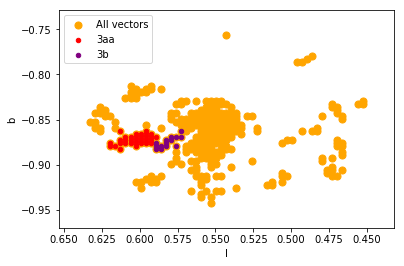

In [7]:
plt.figure()

xvalue = 'ldeg'
yvalue = 'bdeg'

x = vectors_All[xvalue]
y = vectors_All[yvalue]

x1 = vectors_BellTop[xvalue]
y1 = vectors_BellTop[yvalue]
x2 = vectors_BrightBlue[xvalue]
y2 = vectors_BrightBlue[yvalue]
x3 = vectors_BrightRed[xvalue]
y3 = vectors_BrightRed[yvalue]
x4 = vectors_Faint[xvalue] #####
y4 = vectors_Faint[yvalue] #####


x5 = vectors_Leg1a[xvalue]
y5 = vectors_Leg1a[yvalue]
x6 = vectors_Leg2a[xvalue]
y6 = vectors_Leg2a[yvalue]
x7 = vectors_Leg1b[xvalue]
y7 = vectors_Leg1b[yvalue]
x8 = vectors_Leg2b[xvalue]
y8 = vectors_Leg2b[yvalue]
x9 = vectors_Leg3a[xvalue]
y9 = vectors_Leg3a[yvalue]
x10 = vectors_Leg3aa[xvalue]
y10 = vectors_Leg3aa[yvalue]
x11 = vectors_Leg3b[xvalue]
y11 = vectors_Leg3b[yvalue]
x12 = vectors_Leg4a[xvalue]
y12 = vectors_Leg4a[yvalue]
x13 = vectors_Leg5a[xvalue]
y13 = vectors_Leg5a[yvalue]


plt.scatter(x, y, marker='o', color='orange', s=50, label='All vectors')
# plt.scatter(x1, y1, marker='o', color='black', s=20, label='Other')
# plt.scatter(x2, y2, marker='o', color='blue', s=10, label='Other')
# plt.scatter(x3, y3, marker='o', color='red', s=10, label='Other')

# plt.scatter(x5, y5, marker='o', color='green', s=10, label='Leg1')
# plt.scatter(x6, y6, marker='o', color='aqua', s=10, label='Other')
# plt.scatter(x7, y7, marker='o', color='violet', s=10, label='Other')
# plt.scatter(x8, y8, marker='o', color='purple', s=10, label='Other')
#plt.scatter(x9, y9, marker='o', color='purple', s=20, label='Other')

plt.scatter(x10, y10, marker='o', color='red', s=20, label='3aa')
plt.scatter(x11, y11, marker='o', color='purple', s=20, label='3b')

plt.xlabel('l')
plt.ylabel('b')
# plt.scatter(x4, y4, marker='o', color='white', s=10, label='Faint')


plt.legend()

plt.gca().invert_xaxis()

##### WANT TO FIT to the shape of the leg...


# z = np.polyfit(x5, y5, 1) # z,cov - > diag off the 
# f = np.poly1d(z)

# print (z,f)
# xmin = min(x5)
# xmax = max(x5)

# y1 = a * x1**(b)
# y2 = a * x2**(b)
# plt.loglog(self['I'],(self['P']),marker='x',linestyle='None',label=selfname)
# plt.loglog([x1,x2],[y1,y2])

#### LEG 1A does not look correct!!! - selecting all vectors excluding.... !

## Plotting B half vector angles

see: http://docs.astropy.org/en/stable/coordinates/angles.html

In [8]:
# DO a method where self is a lit of vectors_Leg1a, vectors_Leg2a and selfnames is a list of 'Leg 1', 'Leg 2'

def plot_angles_hist(self,selfname,variable,outname):   # calculate l and b is a method
    '''plots hitograms of one or more data sets of the angles, where variable can be ANG or bang'''
    
    anlgevariable = variable
    outfilename = outname
    
    if anlgevariable=='bang':
        histrange = (-40.0,180.0)
    elif anlgevariable=='ANG':
        histrange = (-90.0,90.0)
        
    plt.figure()
    plt.figure(figsize=(10,6))
    for x in range(len(self)):
        vectorfile = self[x]
        vectorlabel = selfname[x]
        
        if x == 0: 
            pltlinestyle = '-'
        if x == 1:
            pltlinestyle = '--'

        plt.hist(vectorfile[variable], range=histrange, label=vectorlabel, histtype='step',linestyle=pltlinestyle)
        plt.xlabel('Angle ($^{\circ}$)')
        plt.ylabel('Number')
        plt.title(variable+' inspection')
        plt.legend()#loc='upper right')
        
        print ('{} ({}) = {:.1f} std = {:.1f}'.format(vectorlabel,anlgevariable,np.median(vectorfile[variable]),np.std(vectorfile[variable])))

    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.pdf')
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.png')
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.pdf')
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-'+anlgevariable+'-'+outfilename+'.png')
 

Leg 1 (bang) = 47.2 std = 21.4
Leg 2 (bang) = 48.9 std = 28.3
Connector 1 (bang) = 102.7 std = 33.6
Connector 2 (bang) = 82.9 std = 19.6


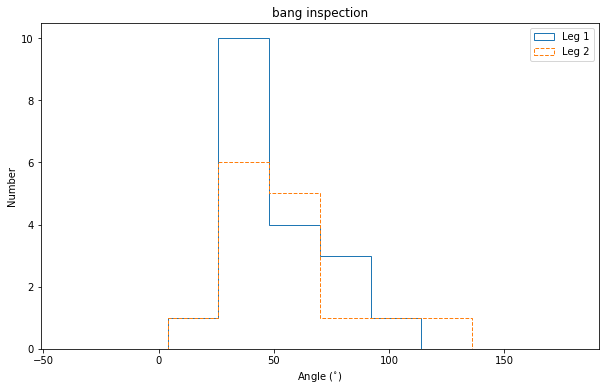

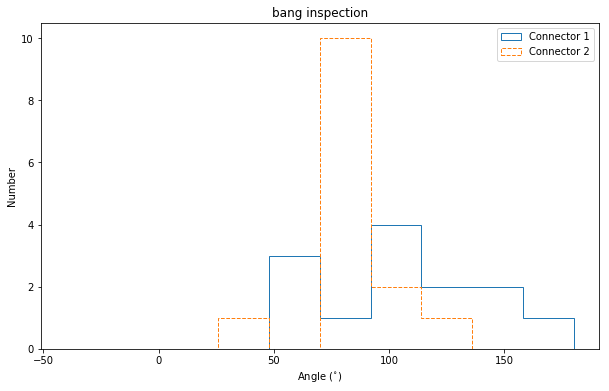

In [9]:
filelist = (vectors_Leg1a,vectors_Leg2a)
namelist = ('Leg 1','Leg 2')
plot_angles_hist(filelist,namelist,'bang','legs12')

filelist = (vectors_Leg1b,vectors_Leg2b)
namelist = ('Connector 1','Connector 2')
plot_angles_hist(filelist,namelist,'bang','legs12')

Leg 3aa (bang) = 60.7 std = 24.1
Leg 3b (bang) = 2.7 std = 20.0
Leg 4 (bang) = 17.6 std = 30.9
Leg 5 (bang) = 80.2 std = 39.3


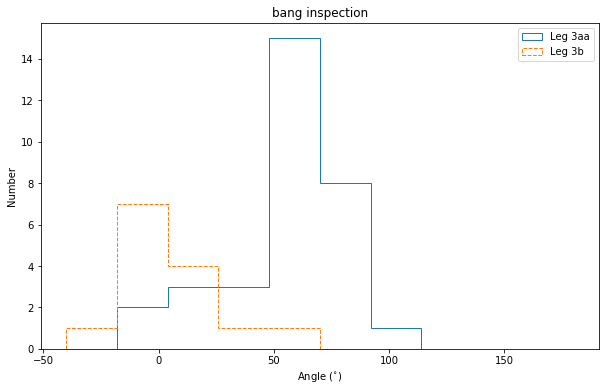

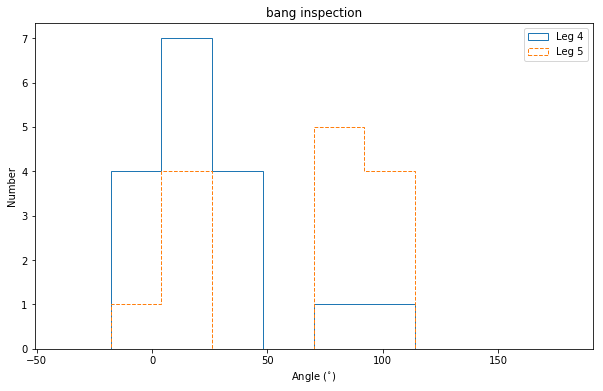

In [10]:
filelist = (vectors_Leg3aa, vectors_Leg3b)
namelist = ('Leg 3aa','Leg 3b')
plot_angles_hist(filelist,namelist,'bang','legs3aab')

filelist = (vectors_Leg4a,vectors_Leg5a)
namelist = ('Leg 4','Leg 5')
plot_angles_hist(filelist,namelist,'bang','legs45')

Blue Outflow (bang) = 130.3 std = 9.0
Red Outflow (bang) = 100.5 std = 22.5
Bell Top* (bang) = 16.6 std = 30.4
Bell Bottom (Faint)** (bang) = 81.2 std = 55.7


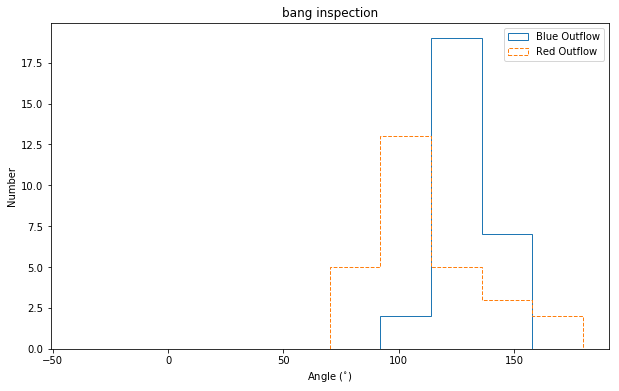

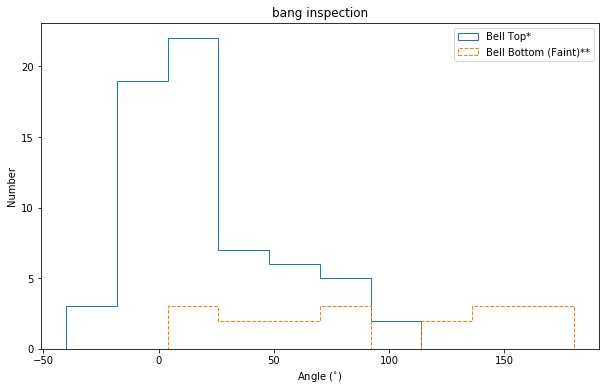

In [11]:
filelist = (vectors_BrightBlue, vectors_BrightRed)
namelist = ('Blue Outflow','Red Outflow')
plot_angles_hist(filelist,namelist,'bang','outflow')

filelist = (vectors_BellTop,vectors_Faint)
namelist = ('Bell Top*','Bell Bottom (Faint)**')
plot_angles_hist(filelist,namelist,'bang','Bell')

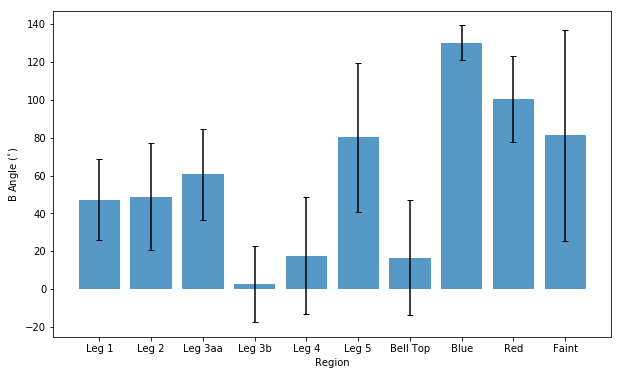

In [12]:
n_groups = 10

variable= 'bang'

region_median = (np.median(vectors_Leg1a[variable]), np.median(vectors_Leg2a[variable]), np.median(vectors_Leg3aa[variable]), np.median(vectors_Leg3b[variable]), np.median(vectors_Leg4a[variable]), np.median(vectors_Leg5a[variable]), np.median(vectors_BellTop[variable]), np.median(vectors_BrightBlue[variable]), np.median(vectors_BrightRed[variable]), np.median(vectors_Faint[variable]))
region_std = (np.std(vectors_Leg1a[variable]), np.std(vectors_Leg2a[variable]), np.std(vectors_Leg3aa[variable]), np.std(vectors_Leg3b[variable]), np.std(vectors_Leg4a[variable]), np.std(vectors_Leg5a[variable]), np.std(vectors_BellTop[variable]), np.std(vectors_BrightBlue[variable]), np.std(vectors_BrightRed[variable]),np.std(vectors_Faint[variable]))

index = np.arange(n_groups)


region_names = ('Leg 1', 'Leg 2', 'Leg 3aa', 'Leg 3b', 'Leg 4', 'Leg 5', 'Bell Top','Blue', 'Red','Faint')
plt.figure(figsize=(10,6))

plt.bar(index, region_median, align='center', alpha=0.75, yerr=region_std, capsize=3)
plt.xticks(index, region_names)
plt.ylabel('B Angle ($^{\circ}$)')
plt.xlabel('Region')

#plt = figure(figsize=(8,8))



try: # if on mac save here:
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.pdf')
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-angles-summary.png')
except: # if on kukui save here:
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.pdf')
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-angles-summary.png')

## Errors

median DANG = 6.050469398498535


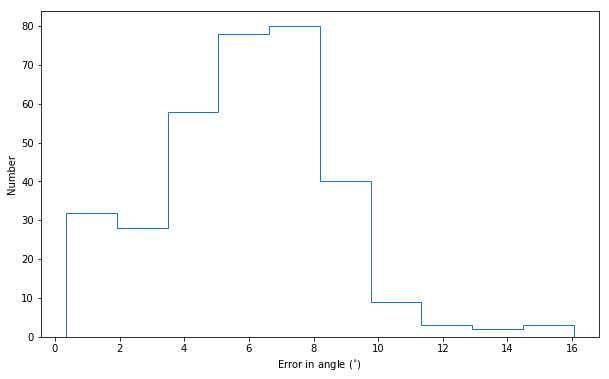

In [13]:
variable = 'DANG'

plt.figure()
plt.figure(figsize=(10,6))
plt.hist(vectors_All[variable], label='All', histtype='step') 
plt.xlabel('Error in angle ($^{\circ}$)')
plt.ylabel('Number')

print ('median DANG = {}'.format(np.median(vectors_All[variable])))


try: # if on mac save here:
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-angles.pdf')
    plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-error-in-B-angles.png')
except: # if on kukui save here:
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-angles.pdf')
    plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-error-in-B-angles.png')
    


# Polar plots

In [25]:
#Steve suggested polar plot: this is known as a rose diagram.



# listoffiles = (vectors_Leg1a,vectors_Leg2a)
# listoffiles = (vectors_BellTop,)
# listoffiles = (vectors_BrightBlue,vectors_Leg3a,vectors_BellTop,)
# listoffiles = (vectors_All,)

# DO a method where self is a lit of vectors_Leg1a, vectors_Leg2a and selfnames is a list of 'Leg 1', 'Leg 2'

def plot_angles_polar(self):   # calculate l and b is a method maybe add: ,selfname,outname
    '''plots polar distribution of magnetci field angles
    where self is a table containing the vectors you wish to plot 
    i.e vectors_Leg3aa,vectors_Leg3b
    '''
    i=0
    for x in range(len(self)):
        i=i+1
        vectorfile = self[x]
        angles = vectorfile['bang'] # angle either from POL-2 rotated by 90dgrees
###         dangles =  vectorfile['DANG'] # error in angles
###         percentage = vectorfile['P']
 
        aglebinwidth_deg = 10###5 ####
        anglebinwidth_rad = np.radians(aglebinwidth_deg)
        anglebinwidth_rad_list = np.array([anglebinwidth_rad for i in range(5,185,aglebinwidth_deg)]) # widths for each bin

        anglebins_deg = [i for i in range(0,185,aglebinwidth_deg)] # bins every 5 degrees
    
        theta_deg = [i+2.5 for i in range(0,180,aglebinwidth_deg)] # middle of bin
        theta_radians = np.array(np.radians(theta_deg)) # middle of bin in radians

#     print ('\nangles for bin edges in degrees: {}'.format(anglebins_deg))
#     print ('\nangles for bin edges in radians: {}'.format(anglebins_rad))
#     print ('\nangles for plotting in radians {}'.format(theta_radians ))
#     print ('\nWidths of bins in radians: {}'.format(anglebinwidth_rad_list))

        wholeanglevalue = []
        for y in range(len(angles)): # want angles in whole numbers for histogram tool
            anglevalue = np.int(format(angles[y], '.0f'))
            wholeanglevalue.append(anglevalue)

#     print ('\narray of POL-2 angles {}'.format(wholeanglevalue))
        
        hisout = np.histogram(wholeanglevalue, bins=anglebins_deg) # creat histogram from data for each specified bin interval
        
        angle_frequency = hisout[0] # this is our output
        angle_bins = hisout[1] # this was our input

#     print ('\nangle frequency = {}'.format(angle_frequency))


        theta = theta_radians
        radii = angle_frequency
        widths = anglebinwidth_rad_list

#     print ('\nlength of arrays = {} {} {}'.format(len(theta), len(radii), len(width)))
#     print ('\ntype of arrays = {} {} {}'.format(type(theta), type(radii), type(width)))

        if i == 1:
            theta1 = theta
            radii1 = radii
            barcolor1 = 'teal'
        if i == 2:
            theta2 = theta
            radii2 = radii        
            barcolor2 = 'goldenrod'
        if i == 3:
            theta3 = theta
            radii3 = radii        
            barcolor3 = 'darkorchid'

        
    fig = figure(figsize=(9,9))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True) # l,b,w,h

    bars = ax.bar(theta1, radii1, width=widths*0.9, bottom=0.0,color=barcolor1,alpha=0.6) # at minimum I will show one dataset
    
    if i > 1:
        bars = ax.bar(theta2, radii2, width=widths*0.9, bottom=0.0,color=barcolor2,alpha=0.6)

    if i >2:
        bars = ax.bar(theta3, radii3, width=widths*0.9, bottom=0.0,color=barcolor3,alpha=0.6,label='dk')    


## Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.jet(r / 10.)) # viridis or jet is a colour selection
#     bar.set_alpha(0.5)

    show()

# colours: https://matplotlib.org/2.0.0/examples/color/named_colors.html

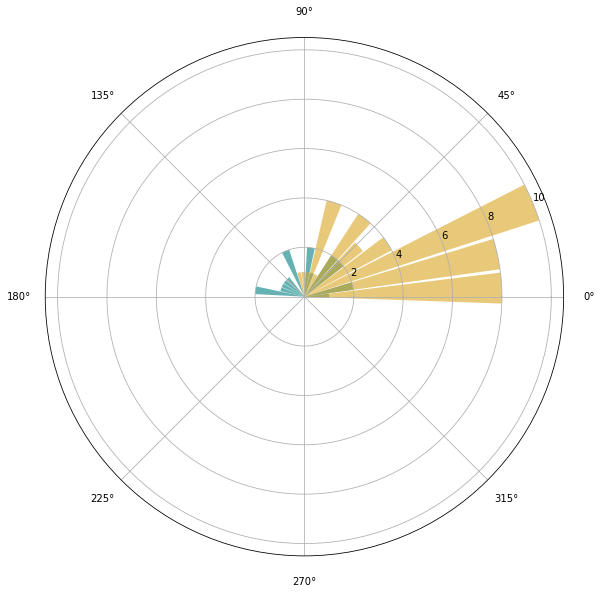

In [31]:
# listoffiles = (vectors_Leg1a,vectors_Leg2a)
# listoffiles = (vectors_Leg1a,vectors_Leg2a)

# listoffiles = (vectors_Leg1b,vectors_Leg2b)

listoffiles = (vectors_Leg3aa,vectors_Leg3b)

listoffiles = (vectors_Leg4a,vectors_Leg5a)

listoffiles = (vectors_BrightBlue,vectors_BrightRed)

listoffiles = (vectors_Faint,vectors_BellTop)


plot_angles_polar(listoffiles)

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='H.parsons', api_key='mLM1jRyLirEC4fWdJG6T')
plotly.__version__

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scatterpolar(
        r = [0.5,1,2,2.5,3,4],
        theta = [35,70,120,155,205,240],
        mode = 'markers',
        marker = dict(
            color = 'peru'
        )
    )
]

layout = go.Layout(
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'polar-basic')


In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Scatterpolar(
        r = [0, 1.5, 1.5, 0, 2.5, 2.5, 0],
        theta = [0, 10, 25, 0, 205, 215, 0],
        mode = 'lines',
        fill = 'toself',
        fillcolor = '#709BFF',
        line =  dict(
            color = 'black'
        )
    ),
    go.Scatterpolar(
        r = [0, 3.5, 3.5, 0],
        theta = [0, 55, 75, 0],
        mode = 'lines',
        fill = 'toself',
        fillcolor = '#E4FF87',
        line =  dict(
            color = 'black'
        )
    ),
    go.Scatterpolar(
        r = [0, 4.5, 4.5, 0, 4.5, 4.5, 0],
        theta = [0, 100, 120, 0, 305, 320, 0],
        mode = 'lines',
        fill = 'toself',
        fillcolor = '#FFAA70',
        line =  dict(
            color = 'black'
        )
    ),
    go.Scatterpolar(
        r = [0, 4, 4, 0],
        theta = [0, 165, 195, 0],
        mode = 'lines',
        fill = 'toself',
        fillcolor = '#FFDF70',
        line =  dict(
            color = 'black'
        )
    ),
    go.Scatterpolar(
        r = [0, 3, 3, 0],
        theta = [0, 262.5, 277.5, 0],
        mode = 'lines',
        fill = 'toself',
        fillcolor = '#B6FFB4',
        line =  dict(
            color = 'black'
        )
    )
]

layout = go.Layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0,5]
        )
    ),
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'polar-area')

In [ ]:
plt.figure()

xvalue = 'I'
yvalue = 'P'

x = vectors_All[xvalue]
y = vectors_All[yvalue]

x1 = vectors_BellTop[xvalue]
y1 = vectors_BellTop[yvalue]

x2 = vectors_BrightBlue[xvalue]
y2 = vectors_BrightBlue[yvalue]

x3 = vectors_BrightRed[xvalue]
y3 = vectors_BrightRed[yvalue]

x4 = vectors_Faint[xvalue]
y4 = vectors_Faint[yvalue]

x5 = vectors_Leg1a[xvalue]
y5 = vectors_Leg1a[yvalue]

x6 = vectors_Leg2a[xvalue]
y6 = vectors_Leg2a[yvalue]

x7 = vectors_Leg3a[xvalue]
y7 = vectors_Leg3a[yvalue]

x8 = vectors_Leg4a[xvalue]
y8 = vectors_Leg4a[yvalue]

x9 = vectors_Leg5a[xvalue]
y9 = vectors_Leg5a[yvalue]

plt.xlabel('Intensity (mJy/beam)')
plt.ylabel('Polarization (%)')

plt.loglog(x1, y1,marker='x',linestyle='None',label='BellTop')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x2, y2,marker='x',linestyle='None',label='Blue')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x3, y3,marker='x',linestyle='None',label='Red')#, marker='o', color='orange', s=50, label='All vectors')
# plt.loglog(x4, y4,marker='x',linestyle='None',label='Bell Bottom (Faint)')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x5, y5,marker='x',linestyle='None',label='Leg 1')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x6, y6,marker='x',linestyle='None',label='Leg 2')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x7, y7,marker='x',linestyle='None',label='Leg 3')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x8, y8,marker='x',linestyle='None',label='Leg 4')#, marker='o', color='orange', s=50, label='All vectors')
plt.loglog(x9, y9,marker='x',linestyle='None',label='Leg 5')#, marker='o', color='orange', s=50, label='All vectors')


plt.legend()#loc='upper right')

# plt.scatter(x6, y6, marker='o', color='blue', s=10, label='Other')


In [ ]:
# want to make a method for fitting and plotting polarization efficiency plots:

def polarization_efficiency(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting polarization efficiency plots (I vs P)'''

    logx = np.log10(self['I'])
    logy = np.log10(self['P'])

    z = np.polyfit(logx, logy, 1) # z,cov - > diag off the 
    f = np.poly1d(z)
    logx_fit = np.linspace(min(logx), max(logx), 50)
    logy_fit = f(logx_fit)
#     plt.plot(logx,logy,'o', logx_fit, logy_fit)
#     plt.title('')
#     plt.xlabel('log ()')
#     plt.ylabel('log()')
#     plt.show()
    print ('z:{}'.format(z))
#     print ('cov:{}'.format(cov))

    print ('\n{}\nfunction in log log space:{}'.format(selfname,f))
    b = f[1]
    loga = f[0]
    a = 10**loga
    print ('loga = {}, a = {}, b = {}'.format(loga,a,b))

    x1 = min(self['I'])
    x2 = max(self['I'])

    y1 = a * x1**(b)
    y2 = a * x2**(b)
    plt.loglog(self['I'],(self['P']),marker='x',linestyle='None',label=selfname)
    plt.loglog([x1,x2],[y1,y2])
    plt.xlabel('Intensity (mJy/beam)')
    plt.ylabel('Polarization (%)')
    plt.legend()#loc='upper right')
    
    try: # if on mac save here:
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency-{}.pdf'.format(selfname))
        plt.savefig('/Users/hparsons/Documents/EAO/Research/JellyFish/images/Jellyfish-B-efficiency-{}.png'.format(selfname))
    except: # if on kukui save here:
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency-{}.pdf'.format(selfname))
        plt.savefig('/export/data2/hparsons/FOP/JellyFish/images/Jellyfish-B-efficiency-{}.png'.format(selfname))
 

In [ ]:
polarization_efficiency(vectors_All,'All')



In [ ]:
# polarization_efficiency(vectors_All)
polarization_efficiency(vectors_Leg1a,'Leg 1')
polarization_efficiency(vectors_Leg2a,'Leg 2')
# polarization_efficiency(vectors_Leg3a,'Leg 3')
# polarization_efficiency(vectors_Leg4a,'Leg 4')
# polarization_efficiency(vectors_Leg5a,'Leg 5')


# polarization_efficiency(vectors_Leg1b,'connector 1')
# polarization_efficiency(vectors_Leg2b,'connector 2')

polarization_efficiency(vectors_BrightBlue,'Blue')
polarization_efficiency(vectors_BrightRed,'Red')
# polarization_efficiency(vectors_BellTop,'BellTop')

## Filamets fitting:

In [ ]:
filament_Leg1a = Table.read(Filament_Leg1a)
filament_Leg2a = Table.read(Filament_Leg2a)
filament_Leg3a = Table.read(Filament_Leg3a)
filament_Leg3aa = Table.read(Filament_Leg3aa)
filament_Leg3b = Table.read(Filament_Leg3b)
filament_Leg4a = Table.read(Filament_Leg4a)

filament_Leg1a_u = filament_Leg1a[filament_Leg1a['PIDENT'] < 6.5] # needs work


In [ ]:
filament_Leg1a_u

In [ ]:

def filamet_angle(self,selfname): # calculates the B angle (POL-2 angle + 90)
    '''fitting and plotting filamets as defined by clumpfind'''

    plt.figure()
    plt.plot(self['Peak1'],self['Peak2'],marker='x',linestyle='None',label=selfname)

    xvalues = self['Peak1']
    yvalues = self['Peak2']

    z = np.polyfit(xvalues, yvalues, 1) # z,cov - > diag off the 
    f = np.poly1d(z)

#    print (z,f)
    c = f[0]
    a = f[1]

#    print (a,c)
    x1 = min(xvalues)
    x2 = max(xvalues)
    y1 = (a * x1) + c
    y2 = (a * x2) + c

    # POL-2 Angle Theta is defined as East from North - so values presented here ARE CORRECT FOR ASTRONOMY!
    
    theta = np.degrees(np.arctan((y2-y1)/(x2-x1)))
    thetapol2 = theta
    
    plt.plot([x1,x2],[y1,y2],marker='x',linestyle='-',label='{:.0f}'.format(thetapol2))
    plt.legend()#loc='upper right')
    plt.gca().invert_xaxis()
    return thetapol2

In [ ]:
thetapol2_Leg1a = filamet_angle(filament_Leg1a,'Leg 1a')   ##### ISSUE
thetapol2_Leg1a_u = filamet_angle(filament_Leg1a_u,'Leg 1a_u')   ##### ISSUE
thetapol2_Leg2a = filamet_angle(filament_Leg2a,'Leg 2a')
thetapol2_Leg3aa = filamet_angle(filament_Leg3aa,'Leg 3aa')   ##### ISSUE
thetapol2_Leg3b = filamet_angle(filament_Leg3b,'Leg 3b')
thetapol2_Leg4a = filamet_angle(filament_Leg4a,'Leg 4a')

In [ ]:
print (thetapol2_Leg2a)
print (thetapol2_Leg4a)

In [ ]:
#Steve suggested polar plot: this is known as a rose diagram.
# if median error is 6deg then maybe plot rose diagram into 5deg ranges

import numpy as np
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc


# force square figure and square axes, looks better for polar
fig = figure(figsize=(8,8))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True) # l,b,w,h

variable = 'bang'

listoffiles = (vectors_Leg1a,vectors_Leg2a,vectors_Leg3aa,vectors_Leg3b,vectors_Leg4a,vectors_Leg5a,vectors_BrightBlue,vectors_BrightRed,vectors_BellTop,vectors_Faint)

theta_value = []
theta_sigma = []
theta_polarization = []

for x in range(len(listoffiles)):
    vectorfile = listoffiles[x]
    angles = vectorfile[variable] # angle either from POL-2 or rotated by 90dgrees - Position
    dangles =  vectorfile['DANG'] # error in angles - Width
    percentage = vectorfile['P'] # percentage polarization - Length
    
    angles_median_deg = np.median(angles)
    angles_median_rad = np.radians(angles_median_deg)
    theta_value.append(angles_median_rad)
    
    angles_std_deg = np.std(dangles)
    angles_median_rad = np.radians(angles_std_deg)
    theta_sigma.append(angles_median_rad)
    
    polarization = np.median(percentage)
    theta_polarization.append(polarization)
    
#     print (angles_median_rad)

#     print (theta_value,theta_sigma,theta_polarization)


    theta = theta_value
    radii = theta_polarization
    width = theta_sigma


bars = ax.bar(theta, radii, width=width, bottom=0.0)


# # Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.jet(r / 10.)) # viridis or jet is a colour selection
#     bar.set_alpha(0.5)

show()


# https://stackoverflow.com/questions/32232285/how-to-change-ticklabels-within-figure-created-with-axisartist?lq=1